**Prediction of Real Estate Prices using MultiLinear Regression**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('/content/Real estate.csv')         #Creating Dataframe
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
df.info()                  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
print('Shape',df.shape)                               # Performing EDA
print('Size',df.size) 
print('Prices','\n',df['Y house price of unit area'])      
print('Max Price',df['Y house price of unit area'].max())
print('Min Price',df['Y house price of unit area'].min())    

Shape (414, 8)
Size 3312
Prices 
 0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64
Max Price 117.5
Min Price 7.6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


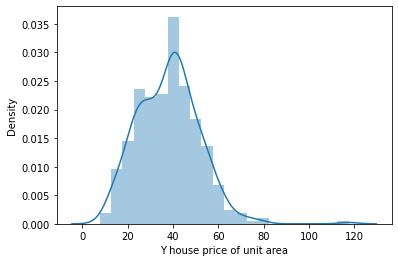

In [ ]:
import seaborn as sns
sns.distplot(df['Y house price of unit area'])                  # shows the density of prices
plt.show()

In [ ]:
house_numeric=df.drop(['No'], axis=1)                      # dropping the number counting column
house_numeric.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
print(house_numeric.shape)                       # column size reduced by 1
print(house_numeric.size)

(414, 7)
2898


In [ ]:
x=house_numeric.iloc[:,0:6].values                # Assigning Input and Output
print(x)
y=house_numeric.iloc[:,6].values
print(y)

[[2012.917     32.        84.87882   10.        24.98298  121.54024]
 [2012.917     19.5      306.5947     9.        24.98034  121.53951]
 [2013.583     13.3      561.9845     5.        24.98746  121.54391]
 ...
 [2013.25      18.8      390.9696     7.        24.97923  121.53986]
 [2013.         8.1      104.8101     5.        24.96674  121.54067]
 [2013.5        6.5       90.45606    9.        24.97433  121.5431 ]]
[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   5

In [ ]:
from sklearn.model_selection import train_test_split                      # Training and Testing the variables
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=0, test_size=0.15)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(351, 6) (351,)
(63, 6) (63,)


In [ ]:
from sklearn.linear_model import LinearRegression               # Running the  regressor algorithm
model=LinearRegression()
model.fit(x_train,y_train)                                      # Fitting the model
y_pred=model.predict(x_test)
print(y_pred)              #predicted values
print(y_test)              #actual values

[39.63344906 12.78125498 42.1922373  12.59267484 41.76524281 40.42226966
 40.89736638 33.48383232 49.55661948 45.83070484 46.11637587 40.69016447
 39.05138121 40.43508227 47.34259811 37.8997588  40.50490287 40.50006279
 40.96941816 42.94104217 50.32361694 30.85932761 39.91558988 45.57943354
 46.29090871 43.83651584 46.74279006 26.23719882 48.09876114 21.69360766
 44.69677081 34.38948829 42.16699961 38.03645259 44.5327123  31.97728759
 48.30926863 39.53679731 53.23005757  7.85838602 52.94228252 32.97191436
 34.20230356 50.15885842 15.25694611 43.47032346 43.01748176 13.0685327
 33.70199121 48.57709487 54.01413441 39.28831087 48.34944493 25.01937016
 30.4921693  34.45726374 48.86972814 40.71556699 43.88045592 32.54189027
 44.25306931 44.03363681 39.04606729]
[45.3 14.4 46.  15.6 50.2 38.1 48.5 41.4 51.6 40.1 42.  42.4 28.5 39.1
 53.7 36.8 40.6 55.2 39.3 44.3 53.5 25.3 22.8 51.7 45.5 34.4 31.6 25.9
 49.5 24.7 51.7 29.7 45.4 50.5 26.5 30.1 46.1 28.9 54.4 15.  44.9 29.8
 23.6 48.  16.7 40.9

In [ ]:
from sklearn.metrics import r2_score                           # Accuracy  = 68%
r2_score(y_test, y_pred)

0.6800088002013969

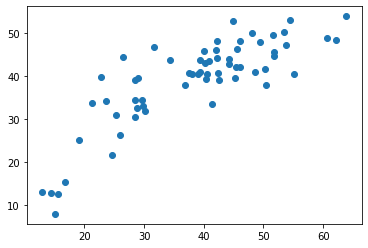

In [ ]:
plt.scatter(y_test,y_pred)              # Data Visualization using matplotlib
plt.show()

In [ ]:
df1=pd.DataFrame({'Actual Data':y_test, 'Predicted Data':y_pred})          # actual vs predicted table
df1

,Actual Data,Predicted Data
0,45.3,39.633449
1,14.4,12.781255
2,46.0,42.192237
3,15.6,12.592675
4,50.2,41.765243
...,...,...
58,39.3,43.880456
59,28.8,32.541890
60,42.3,44.253069
61,44.3,44.033637


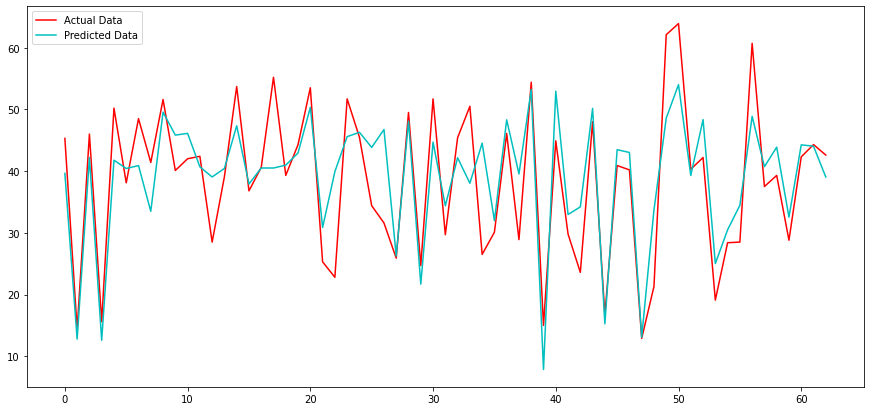

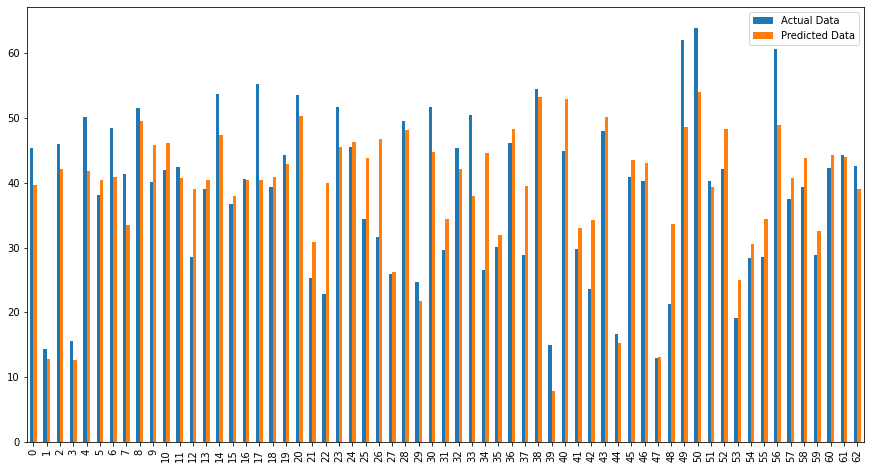

In [ ]:
df1.plot(figsize=(15,7), color=['r','c'])                      # Panda plot 
plt.show()
df1.plot(figsize=(15,8), kind="bar")
plt.show()

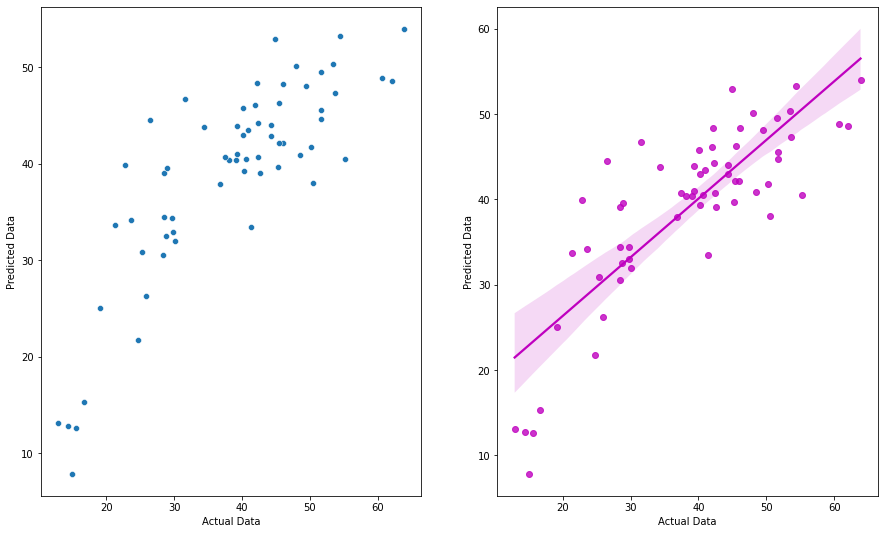

In [ ]:
plt.figure(figsize=(15,9))                                # Regression plot using seaborn
plt.subplot(1,2,1)
sns.scatterplot(x='Actual Data',y='Predicted Data', data=df1)

plt.subplot(1,2,2)
sns.regplot(x='Actual Data',y='Predicted Data', data=df1, color='m')            # Data Visualization
plt.show()

In [ ]:
model.predict([[2012.954,36,81.32,9,24.97,121.54]])           # Predicting the output

array([42.91182896])

The Model is created to predict the Real Estate prices with an accuracy of 68%

Name: Uday Kiran

Email: aredla_911930@student.nitw.ac.in